In [9]:
from shift_dev import SHIFTDataset
from shift_dev.types import Keys
from shift_dev.utils.backend import FileBackend

dataset = SHIFTDataset(
    data_root="./dataset_root",
    split="train",
    keys_to_load=[
        Keys.images,
        Keys.intrinsics,
        Keys.boxes2d,
        Keys.boxes2d_classes,
        Keys.boxes2d_track_ids,
        Keys.segmentation_masks,
    ],
    views_to_load=["front"],
    framerate="images",
    shift_type="discrete",
    backend=FileBackend(),  # also supports HDF5Backend(), FileBackend()
    verbose=True,
)

[04/17/2023 15:52:44] SHIFT DevKit - INFO - Loading annotation from './dataset_root/discrete/images/train/front/det_2d.json' ...
[04/17/2023 15:52:50] SHIFT DevKit - INFO - Loading annotation from './dataset_root/discrete/images/train/front/det_2d.json' Done.
[04/17/2023 15:53:21] SHIFT DevKit - INFO - Loading annotation takes 36.56 seconds.


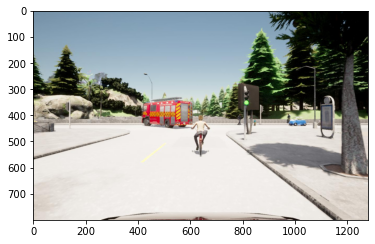

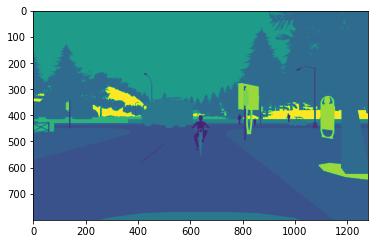

In [66]:
## Visualiasing the ShiftDataset input and output

import matplotlib.pyplot as plt
import numpy as np

tensorImage = dataset[340]['front']['images'][0]/255
image = np.transpose(tensorImage, (1, 2, 0))  # Transpose dimensions to (width, height, channels)
plt.imshow(image)
plt.show()

tensorImage_GT = dataset[340]['front']['segmentation_masks']
image_GT = np.transpose(tensorImage_GT, (1, 2, 0))  # Transpose dimensions to (width, height, channels)
plt.imshow(image_GT)
plt.show()


In [67]:
from mmseg.datasets.builder import DATASETS
from mmseg.datasets.custom import CustomDataset

@DATASETS.register_module()


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
